# Next Steps
1. Combine train and test data to do scrubbing (set "Survived" = 2 for test to split later) - Done
2. Bin age data and create categorical variable
3. Split name into title - Done
4. Plot of accuracy by hyperparameter combinations to see if we have right ranges to compare

In [1757]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For loading images
from PIL import Image
import requests
from io import BytesIO

In [1758]:
from sklearn.metrics import accuracy_score

In [1759]:
# Data Dictionary
# VariableDefinitionKey survival Survival 0 = No, 1 = Yes 
# pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
# sex Sex
# Age Age in years
# sibsp # of siblings / spouses aboard the Titanic
# parch # of parents / children aboard the Titanic 
# ticket Ticket number 
# fare Passenger fare 
# cabin Cabin number
# embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
# Variable Notes
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

In [1760]:
train_data = pd.read_csv("train.csv",index_col='PassengerId')
test_data = pd.read_csv("test.csv",index_col='PassengerId')
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1761]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [1762]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1763]:
train_data.shape, test_data.shape

((891, 11), (418, 10))

In [1764]:
train_data.groupby('Survived').count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


In [1765]:
test_data['Survived'] = 2

In [1766]:
combined_data = pd.concat([train_data,test_data[train_data.columns]])

In [1767]:
# Removing columns we know we won't use for modeling
small_cols = ['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Fare','Embarked','Ticket','Cabin']

In [1768]:
# Creating new dataframe with less columns
combined_data_small = combined_data[small_cols]

In [1769]:
combined_data_small.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Embarked       2
Ticket         0
Cabin       1014
dtype: int64

<h2>Initial Feature Engineering</h2>

In [1770]:
# Defining function to get title from name
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

# Defining function to get surname from name
def extract_surname(name):
    return name.split(',')[0].strip()

In [1771]:
combined_data_small['title'] = combined_data_small.Name.apply(extract_title)
combined_data_small['surname'] = combined_data_small.Name.apply(extract_surname)

combined_data_small = combined_data_small.drop('Name',axis=1)

/Users/tyler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tyler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1772]:
combined_data_small.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Embarked       2
Ticket         0
Cabin       1014
title          0
surname        0
dtype: int64

In [1773]:
# Filling missing age with average Title age
age_ref = combined_data_small.groupby('title').Age.mean()

combined_data_small['Age'] = combined_data_small.apply(lambda r: r.Age if pd.notnull(r.Age) else age_ref[r.title] , axis=1)


In [1774]:
# Filling null Cabin with a value given this could be passengers without cabins
combined_data_small.Cabin.fillna('X', inplace=True)

In [1775]:
# Filling remaining missing with an out of range number, which should be seen as drastically different by CatBoost
combined_data_small.fillna(-999, inplace=True)

In [1776]:
combined_data_small.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Ticket      0
Cabin       0
title       0
surname     0
dtype: int64

In [1777]:
# A lot of categories so could consolidate
combined_data_small.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [1778]:
# Making title replacements for larger groups
combined_data_small.title.replace(to_replace = ["Dr", "Rev", "Col", "Major", "Capt"], value = "Officer",\
                                  inplace = True,regex=True)

combined_data_small.title.replace(to_replace = ["Dona", "Jonkheer", "Countess", "Sir", "Lady", "Don"],\
                                  value = "Aristocrat", inplace = True,regex=True)

combined_data_small.title.replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)

combined_data_small.title.replace({"the Aristocrat":"Aristocrat"}, inplace = True,regex=True)

In [1779]:
# Generalizing tickets by first digit
combined_data_small.Ticket = combined_data_small.Ticket.str.split(" ").str.get(0).str.get(0)
combined_data_small.Ticket = np.where(combined_data_small.Ticket.str.isdigit(), "N",\
                                     combined_data_small.Ticket.str.split(" ").str.get(0).str.get(0))

In [1780]:
# Pulling first letter from Cabin, which specifies deck
combined_data_small.Cabin = combined_data_small.Cabin.str.split(" ").str.get(0).str.get(0)

In [1781]:
# Creating a column for total family size
combined_data_small['tot_family'] = combined_data_small['SibSp'] + combined_data_small['Parch'] + 1

In [1783]:
# Adding death rate by family. Need fatality rate by surname in train data then join to test data

In [1798]:
# Groupby using surname and tot_family(to remove dupes if possible)
surname_dr = combined_data_small[combined_data_small.Survived!=2].groupby(['surname','tot_family'])\
                        .agg({'Survived':'sum','Pclass':'count'}).reset_index()


In [1799]:
surname_dr['surname_dr'] = surname_dr.Survived / surname_dr.tot_family

In [1800]:
# Creating new df to handle next transformations
combined_data_small2 = combined_data_small
combined_data_small2.shape

(1309, 13)

In [1895]:
combined_data_small2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket,Cabin,...,Cabin_F,Cabin_G,Cabin_T,Cabin_X,title_Aristocrat,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,-0.598759,1.0,0.0,-0.427633,S,A,X,...,0,0,0,1,0,0,0,1,0,0
2,1,1,female,0.614395,1.0,0.0,0.656537,C,P,C,...,0,0,0,0,0,0,0,0,1,0
3,1,3,female,-0.295471,0.0,0.0,-0.416204,S,S,X,...,0,0,0,1,0,0,1,0,0,0
4,1,1,female,0.386928,1.0,0.0,0.348669,S,N,C,...,0,0,0,0,0,0,0,0,1,0
5,0,3,male,0.386928,0.0,0.0,-0.414088,S,N,X,...,0,0,0,1,0,0,0,1,0,0


In [1801]:
# Setting index to surname to allow for join
surname_dr = surname_dr.set_index('surname')
surname_dr.head()

,tot_family,Survived,Pclass,surname_dr
surname,,,,
Abbing,1,0,1,0.000000
Abbott,3,1,2,0.333333
Abelson,2,1,2,0.500000
Adahl,1,0,1,0.000000
Adams,1,0,1,0.000000


In [1802]:
# Joining surname df to combined to add death rate (dr)
combined_data_small2 = combined_data_small2.join(surname_dr['surname_dr'],on='surname',how='left').reset_index()\
                            .sort_values(['PassengerId','surname_dr']).drop_duplicates(subset='PassengerId')\
                            .set_index('PassengerId')

In [1803]:
# Lots of nulls in the df for surname
combined_data_small2.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Ticket          0
Cabin           0
title           0
surname         0
tot_family      0
surname_dr    230
dtype: int64

In [1805]:
# Setting surname_dr to mean for missing values
combined_data_small2.fillna(combined_data_small2.surname_dr.mean(), inplace=True)

In [1806]:
combined_data_small2['Survived'] = combined_data_small2['Survived'].astype('str')

In [1807]:
# Splitting train and test data after cleaning
train_data = combined_data_small2[combined_data_small2['Survived'] !='2']
test_data = combined_data_small2[combined_data_small2['Survived'] =='2']

<h2>Exploring Survival Rates by Different Features</h2>

In [1809]:
train_data.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket,Cabin,title,surname,tot_family,surname_dr
Survived,,,,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342,342,342,342,342,342


In [1810]:
train_data.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,tot_family,surname_dr
Survived,,,,,,,
0,2.531876,30.678205,0.553734,0.329690,22.117887,1.883424,0.055577
1,1.950292,28.301510,0.473684,0.464912,48.395408,1.938596,0.761807


In [1811]:
train_data.groupby('title').mean()

,Pclass,Age,SibSp,Parch,Fare,tot_family,surname_dr
title,,,,,,,
Aristocrat,1.000000,41.600000,0.400000,0.000000,42.150000,1.400000,0.600000
Master,2.625000,4.665014,2.300000,1.375000,34.703125,4.675000,0.287500
Miss,2.291892,21.831744,0.702703,0.540541,43.800092,2.243243,0.581223
Mr,2.410058,32.341404,0.288201,0.152805,24.441560,1.441006,0.193493
Mrs,1.992063,35.951587,0.690476,0.825397,45.330290,2.515873,0.498583
Officer,1.444444,46.531746,0.333333,0.111111,35.786344,1.444444,0.342593


In [1812]:
train_data.groupby('Sex').mean()

,Pclass,Age,SibSp,Parch,Fare,tot_family,surname_dr
Sex,,,,,,,
female,2.159236,27.703097,0.694268,0.649682,44.479818,2.343949,0.552062
male,2.389948,30.888523,0.429809,0.235702,25.523893,1.665511,0.203990


In [1813]:
train_data.groupby('Ticket').mean()

,Pclass,Age,SibSp,Parch,Fare,tot_family,surname_dr
Ticket,,,,,,,
A,3.000000,29.965962,0.206897,0.068966,9.975286,1.275862,0.103448
C,2.574468,25.591786,2.021277,1.063830,28.335462,4.085106,0.276596
F,2.000000,34.750307,0.428571,0.571429,24.223214,2.000000,0.285714
L,3.000000,32.250000,0.000000,0.000000,0.000000,1.000000,0.250000
N,2.347958,29.545068,0.470499,0.364599,27.130899,1.835098,0.329425
P,1.123077,35.469067,0.353846,0.261538,114.085831,1.615385,0.522564
S,2.584615,27.873715,0.276923,0.138462,17.347822,1.415385,0.279487
W,2.307692,33.138510,0.769231,1.307692,32.817308,3.076923,0.166667


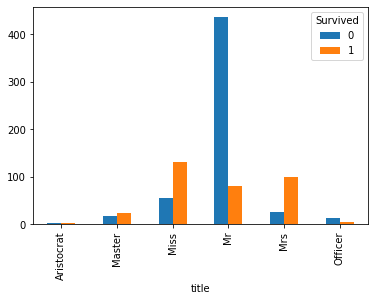

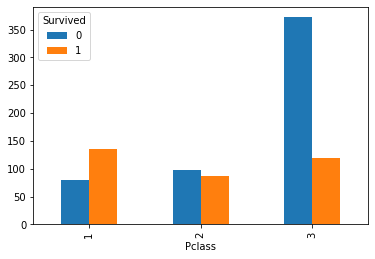

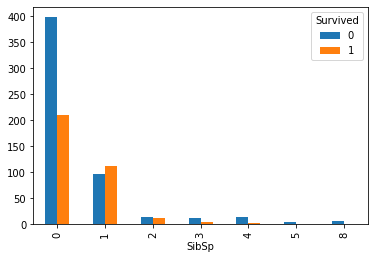

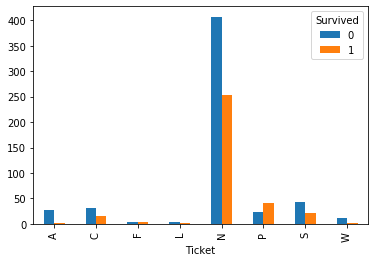

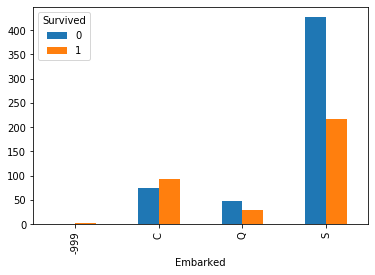

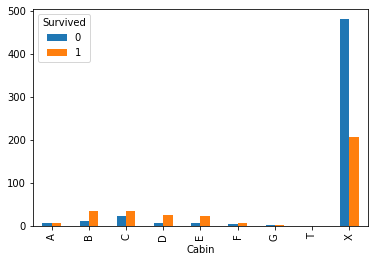

In [1814]:
import matplotlib.pyplot as plt

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1 = pd.crosstab(train_data.title,train_data.Survived).plot(kind='bar')
ax2 = pd.crosstab(train_data.Pclass,train_data.Survived).plot(kind='bar')
ax3 = pd.crosstab(train_data.SibSp,train_data.Survived).plot(kind='bar')
ax3 = pd.crosstab(train_data.Ticket,train_data.Survived).plot(kind='bar')
ax3 = pd.crosstab(train_data.Embarked,train_data.Survived).plot(kind='bar')
ax3 = pd.crosstab(train_data.Cabin,train_data.Survived).plot(kind='bar')

In [1841]:
train_data.Age.max()

80.0

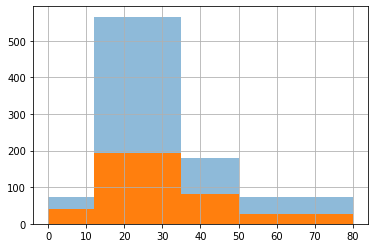

In [1842]:
bin_list = [0, 12, 35, 50, 80]

train_data.Age.hist(bins=bin_list,alpha=0.5)
train_data[train_data['Survived']=='1'].Age.hist(bins=bin_list)

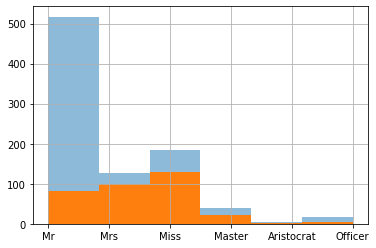

In [1816]:
bins = 6

train_data.title.hist(bins=bins,alpha=0.5)
train_data[train_data['Survived']=='1'].title.hist(bins=bins)

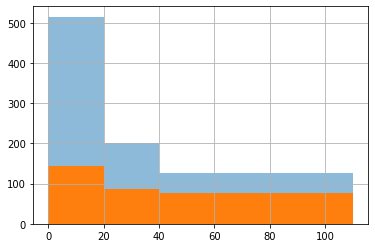

In [1844]:
bin_list = [0, 20, 40, 110]

train_data.Fare.hist(bins=bin_list,alpha=0.5)
train_data[train_data['Survived']=='1'].Fare.hist(bins=bin_list)

In [1676]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket,Cabin,title,surname,tot_family,surname_dr
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.0,1.0,0.0,7.2500,S,A,X,Mr,Braund,2,0.0
2,1,1,female,38.0,1.0,0.0,71.2833,C,P,C,Mrs,Cumings,2,0.5
3,1,3,female,26.0,0.0,0.0,7.9250,S,S,X,Miss,Heikkinen,1,1.0
4,1,1,female,35.0,1.0,0.0,53.1000,S,N,C,Mrs,Futrelle,2,0.5
5,0,3,male,35.0,0.0,0.0,8.0500,S,N,X,Mr,Allen,1,1.0


<h2>Further Feature Engineering</h2>

In [1824]:
# Scaling Fare since it's heavily skewed right and Age
from sklearn import preprocessing
combined_data_small2.Fare = preprocessing.scale(combined_data_small2.Fare)
combined_data_small2.Age = preprocessing.scale(combined_data_small2.Age)

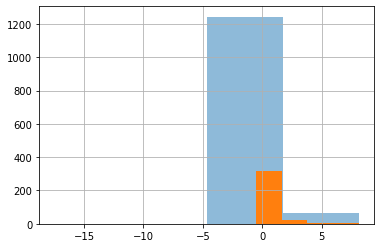

In [1826]:
bins = 4

combined_data_small2.Fare.hist(bins=bins,alpha=0.5)
combined_data_small2[combined_data_small2['Survived']=='1'].Fare.hist(bins=bins)

<h2>Encoding Categorical Variables</h2>

In [1845]:
# Creating new encoded features for train and test data

combined_data_small2.Pclass = combined_data_small2.Pclass.astype('object')
combined_data_small2.SibSp = combined_data_small2.SibSp.astype('float')
combined_data_small2.Parch = combined_data_small2.Parch.astype('float')

In [1846]:
categorical_features = ['Pclass', 'Ticket', 'Cabin', 'title']

In [1847]:
for var in categorical_features:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(combined_data_small2[var], prefix=var)
    combined_data_small2=combined_data_small2.join(cat_list)
    data=combined_data_small2

In [1848]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket,Cabin,...,Cabin_F,Cabin_G,Cabin_T,Cabin_X,title_Aristocrat,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,-0.598759,1.0,0.0,-0.427633,S,A,X,...,0,0,0,1,0,0,0,1,0,0
2,1,1,female,0.614395,1.0,0.0,0.656537,C,P,C,...,0,0,0,0,0,0,0,0,1,0
3,1,3,female,-0.295471,0.0,0.0,-0.416204,S,S,X,...,0,0,0,1,0,0,1,0,0,0
4,1,1,female,0.386928,1.0,0.0,0.348669,S,N,C,...,0,0,0,0,0,0,0,0,1,0
5,0,3,male,0.386928,0.0,0.0,-0.414088,S,N,X,...,0,0,0,1,0,0,0,1,0,0


In [1849]:
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical_features]

In [1850]:
data_final=data[to_keep].drop('surname',axis=1)
data_final.columns.values

array(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'tot_family', 'surname_dr', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Ticket_A', 'Ticket_C', 'Ticket_F', 'Ticket_L', 'Ticket_N',
       'Ticket_P', 'Ticket_S', 'Ticket_W', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_X', 'title_Aristocrat', 'title_Master', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_Officer'], dtype=object)

In [1851]:
data_final.Sex = data_final.Sex.replace({'male': 0, 'female': 1})

In [1852]:
data_final.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,tot_family,surname_dr,Pclass_1,...,Cabin_F,Cabin_G,Cabin_T,Cabin_X,title_Aristocrat,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,-0.598759,1.0,0.0,-0.427633,S,2,0.0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0.614395,1.0,0.0,0.656537,C,2,0.5,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,-0.295471,0.0,0.0,-0.416204,S,1,1.0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,1,0.386928,1.0,0.0,0.348669,S,2,0.5,1,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0.386928,0.0,0.0,-0.414088,S,1,1.0,0,...,0,0,0,1,0,0,0,1,0,0


In [1853]:
data_final['Survived'] = data_final['Survived'].astype('str')

In [1854]:
# Splitting train and test data after feature engineering
train_data = data_final[data_final['Survived'] !='2']
test_data = data_final[data_final['Survived'] =='2']

In [1855]:
X = train_data.drop(['Survived','Embarked'], axis=1)
y = train_data.Survived.astype('int')

In [1856]:
# # Oversampling unbalanced minority class
# from imblearn.over_sampling import SMOTE

# os = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
columns = X_train.columns

# os_data_X,os_data_y=os.fit_sample(X_train, y_train)
# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# os_data_X,os_data_y=os.fit_sample(X_train, y_train)
# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# # we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_X))
# print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
# print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [1713]:
# # Using Recursive Feature Elimination to only include most important features in model - For Oversampling
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()
# rfe = RFE(logreg, 20)
# rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

In [1858]:
# Using Recursive Feature Elimination to only include most important features in model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False  True False False  True  True False
  True False False False  True  True  True  True  True  True False  True
  True False  True False  True  True  True  True  True]
[ 1  1  7  8  3  4  1 12  6  1  1 14  1  5 10  2  1  1  1  1  1  1  9  1
  1 11  1 13  1  1  1  1  1]


In [1859]:
# Filtering X to only include most important features
new_cols = X_train.columns[rfe.support_]

X_train = X_train[new_cols]
X_train.columns

Index(['Sex', 'Age', 'surname_dr', 'Pclass_3', 'Ticket_A', 'Ticket_F',
       'Ticket_S', 'Ticket_W', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_F', 'Cabin_G', 'Cabin_X', 'title_Master', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_Officer'],
      dtype='object')

In [1716]:
# Had to drop new Pclass columns due to logit errors
# X_train = X_train.drop(['Pclass_1','Pclass_2'],axis=1)

In [1860]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train.astype('float'),X_train.astype('float'))
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.151148
         Iterations: 35
                              Results: Logit
Model:                  Logit              Pseudo R-squared:   0.771      
Dependent Variable:     Survived           AIC:                228.3306   
Date:                   2020-07-06 08:51   BIC:                317.0215   
No. Observations:       623                Log-Likelihood:     -94.165    
Df Model:               19                 LL-Null:            -410.79    
Df Residuals:           603                LLR p-value:        4.8051e-122
Converged:              0.0000             Scale:              1.0000     
No. Iterations:         35.0000                                           
--------------------------------------------------------------------------
               Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
--------------------------------------------------------------------------
Sex            16.2099 112473.8329  0.0001 0.9999 -220428.4518 2

/Users/tyler/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [1861]:
# Dropping columns with P values higher than .05
X_train = X_train[result.params.index[result.pvalues.values <= .5]]

In [1862]:
logit_model=sm.Logit(y_train.astype('float'),X_train.astype('float'))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.157048
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.762      
Dependent Variable: Survived         AIC:              217.6824   
Date:               2020-07-06 08:53 BIC:              266.4624   
No. Observations:   623              Log-Likelihood:   -97.841    
Df Model:           10               LL-Null:          -410.79    
Df Residuals:       612              LLR p-value:      4.9612e-128
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------
Age                0.0104   0.1921  0.0540 0.9569  -0.3662  0.3869
surname_dr         7.7557   0.7424 10.4465 0.0000   6

In [1863]:
# Can drop additional columns with high p values
X = X[list(result.params.index[result.pvalues.values <= .05])]

In [1864]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=42)

logreg = LogisticRegression(solver='liblinear',max_iter=1000,C=10)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [1865]:
y_pred = logreg.predict(X_validation)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_validation, y_validation)))


Accuracy of logistic regression classifier on test set: 0.93


In [1866]:
# Setting up confusion matrix
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
confusion_matrix = confusion_matrix(y_validation, y_pred)
print(confusion_matrix)

[[149   8]
 [ 11 100]]


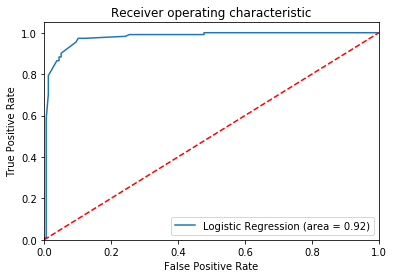

In [1867]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_validation, logreg.predict(X_validation))
fpr, tpr, thresholds = roc_curve(y_validation, logreg.predict_proba(X_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1868]:
from sklearn.metrics import classification_report, make_scorer
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       157
           1       0.93      0.90      0.91       111

    accuracy                           0.93       268
   macro avg       0.93      0.92      0.93       268
weighted avg       0.93      0.93      0.93       268



In [1869]:
# need to manipulate submission data next...

In [1870]:
categorical_features

['Pclass', 'Ticket', 'Cabin', 'title']

In [1871]:
test_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,tot_family,surname_dr,Pclass_1,...,Cabin_F,Cabin_G,Cabin_T,Cabin_X,title_Aristocrat,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,2,0,0.349017,0.0,0.0,-0.417826,Q,1,3.000000,0,...,0,0,0,1,0,0,0,1,0,0
893,2,1,1.296794,1.0,0.0,-0.431865,S,2,0.322984,0,...,0,0,0,1,0,0,0,0,1,0
894,2,0,2.434126,0.0,0.0,-0.386362,Q,1,0.322984,0,...,0,0,0,1,0,0,0,1,0,0
895,2,0,-0.219649,0.0,0.0,-0.403717,S,1,0.322984,0,...,0,0,0,1,0,0,0,1,0,0
896,2,1,-0.598759,1.0,1.0,-0.342341,S,3,0.500000,0,...,0,0,0,1,0,0,0,0,1,0


In [1730]:
# Already set up encoded columns?
# for var in test_data[categorical_features]:
#     cat_list='var'+'_'+var
#     cat_list = pd.get_dummies(test_data[var], prefix=var)
#     test_data=test_data.join(cat_list)
#     data=test_data

In [1872]:
X_train.columns

Index(['surname_dr', 'Pclass_3', 'Cabin_B', 'title_Mr', 'title_Officer'], dtype='object')

In [1873]:
X_test = test_data[X_train.columns]

# X_test.Sex = X_test.Sex.replace({'male': 0, 'female': 1})

In [1874]:
submission = pd.DataFrame()
submission['PassengerId'] = X_test.index
submission['Survived'] = logreg.predict(X_test)

In [1875]:
submission.to_csv('submission_log_reg_{}.csv'.format(logreg.score(X_validation, y_validation)), index=False)
print('submission_log_reg_{}.csv'.format(logreg.score(X_validation, y_validation)))

submission_log_reg_0.9291044776119403.csv


In [ ]:
# Current score is 0.7488

## Exploring Parameter Tuning

In [1876]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [1877]:
#Logistic Regression GridSearch parameters
lr = LogisticRegression(solver='liblinear')

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
class_weight = ['balanced',None]
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values,class_weight=class_weight)

In [1878]:
# Setting parameters for cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                                 random_state=1)

In [1888]:
# Performing a grid search with set parameters
grid_search = GridSearchCV(estimator=lr, scoring='accuracy', refit='recall_score',
                  param_grid=lr_grid, n_jobs=-1, cv=cv,  
                  error_score=0)


In [1889]:
grid_clf_acc = grid_search.fit(X_train, y_train.values.ravel())

In [1890]:
grid_clf_acc.score(X_validation,y_validation)

0.9253731343283582

In [1891]:
grid_clf_acc.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}

In [1892]:
logreg = LogisticRegression(solver='newton-cg',C=.1,penalty='l2',max_iter=2000,class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [1893]:
y_pred = logreg.predict(X_validation)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_validation, y_validation)))


Accuracy of logistic regression classifier on test set: 0.93


In [1894]:
submission = pd.DataFrame()
submission['PassengerId'] = X_test.index
submission['Survived'] = logreg.predict(X_test)

submission.to_csv('submission_log_reg_grid_search_{}.csv'.format(logreg.score(X_validation, y_validation)),index=False)
print('submission_log_reg_grid_search_{}.csv'.format(logreg.score(X_validation, y_validation)))

submission_log_reg_grid_search_0.9253731343283582.csv


In [1749]:
# This gives a better score than pre-grid search, but definitely overfit - 0.78947

In [ ]:
# Some Resources used

# https://towardsdatascience.com/available-hyperparameter-optimization-techniques-dc60fb836264
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
# https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
